# # Cross-Country Solar Potential Analysis
## MoonLight Energy Solutions - Strategic Comparison

# **Objective**: Compare solar potential across Benin, Sierra Leone, and Togo to identify optimal investment regions.

 ## 1. Import Libraries and Setup

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway, kruskal
import warnings
warnings.filterwarnings('ignore')

# Set professional styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


# ## 2. Load Cleaned Datasets

In [2]:
print(" LOADING CLEANED DATASETS")
print("="*40)

try:
    # Load all three cleaned datasets
    benin = pd.read_csv('../data/benin_clean.csv')
    sierra_leone = pd.read_csv('../data/sierra_leone_clean.csv')
    togo = pd.read_csv('../data/togo_clean.csv')
    
    print("✅ All datasets loaded successfully!")
    
except FileNotFoundError as e:
    print(f"❌ Error loading datasets: {e}")
    print("Please ensure all cleaned CSV files exist in the data/ folder")
    # Create empty dataframes for demonstration
    benin = pd.DataFrame()
    sierra_leone = pd.DataFrame()
    togo = pd.DataFrame()

# Add country identifiers
benin['country'] = 'Benin'
sierra_leone['country'] = 'Sierra Leone'
togo['country'] = 'Togo'

print(f"\n📊 Dataset Sizes:")
print(f"  • Benin: {len(benin):,} records")
print(f"  • Sierra Leone: {len(sierra_leone):,} records") 
print(f"  • Togo: {len(togo):,} records")

# Display sample data
print(f"\n🔍 Benin Sample Data:")
benin.head(3)

 LOADING CLEANED DATASETS
✅ All datasets loaded successfully!

📊 Dataset Sizes:
  • Benin: 525,600 records
  • Sierra Leone: 525,600 records
  • Togo: 525,600 records

🔍 Benin Sample Data:


,Timestamp,GHI,DNI,DHI,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,country
0,2021-08-09 00:01:00,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,Benin


# ## 3. Data Preparation and Validation

In [3]:

print(" DATA PREPARATION AND VALIDATION")
print("="*45)

# Check common columns across datasets
common_columns = list(set(benin.columns) & set(sierra_leone.columns) & set(togo.columns))
print(f"Common columns across all datasets: {len(common_columns)}")
print("Key solar metrics available:", [col for col in common_columns if col in ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']])

# Combine datasets for comparative analysis
all_countries = pd.concat([benin, sierra_leone, togo], ignore_index=True)

print(f"\n📈 Combined dataset: {len(all_countries):,} total records")
print(f"Country distribution:")
country_counts = all_countries['country'].value_counts()
for country, count in country_counts.items():
    print(f"  • {country}: {count:,} records ({count/len(all_countries)*100:.1f}%)")

# Verify key solar metrics are available
solar_metrics = ['GHI', 'DNI', 'DHI']
missing_metrics = [metric for metric in solar_metrics if metric not in all_countries.columns]

if missing_metrics:
    print(f"🚨 Missing solar metrics: {missing_metrics}")
else:
    print("✅ All key solar metrics available for analysis")

 DATA PREPARATION AND VALIDATION
Common columns across all datasets: 15
Key solar metrics available: ['DNI', 'DHI', 'RH', 'WS', 'GHI', 'Tamb']

📈 Combined dataset: 1,576,800 total records
Country distribution:
  • Benin: 525,600 records (33.3%)
  • Sierra Leone: 525,600 records (33.3%)
  • Togo: 525,600 records (33.3%)
✅ All key solar metrics available for analysis


# ## 4. Comprehensive Metric Comparison

# ### 4.1 Boxplot Visualization - Side by Side Comparison

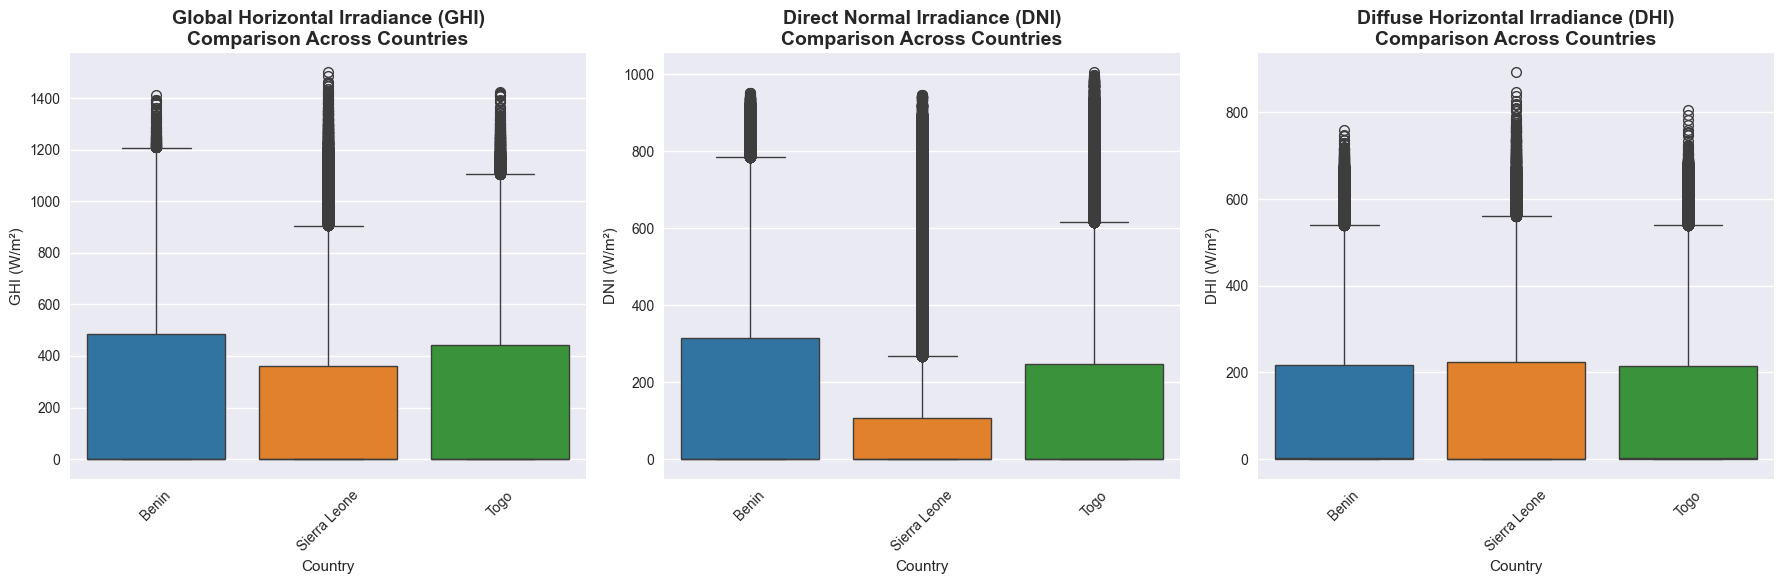

In [4]:
# Create professional boxplot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Color scheme for countries
country_palette = {'Benin': '#1f77b4', 'Sierra Leone': '#ff7f0e', 'Togo': '#2ca02c'}

# Plot 1: GHI Comparison
sns.boxplot(data=all_countries, x='country', y='GHI', ax=axes[0], palette=country_palette)
axes[0].set_title('Global Horizontal Irradiance (GHI)\nComparison Across Countries', 
                  fontweight='bold', fontsize=14)
axes[0].set_xlabel('Country')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: DNI Comparison
sns.boxplot(data=all_countries, x='country', y='DNI', ax=axes[1], palette=country_palette)
axes[1].set_title('Direct Normal Irradiance (DNI)\nComparison Across Countries', 
                  fontweight='bold', fontsize=14)
axes[1].set_xlabel('Country')
axes[1].set_ylabel('DNI (W/m²)')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: DHI Comparison
sns.boxplot(data=all_countries, x='country', y='DHI', ax=axes[2], palette=country_palette)
axes[2].set_title('Diffuse Horizontal Irradiance (DHI)\nComparison Across Countries', 
                  fontweight='bold', fontsize=14)
axes[2].set_xlabel('Country')
axes[2].set_ylabel('DHI (W/m²)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# ### 4.1 Statistical Summary Table

In [5]:

print("📈 STATISTICAL SUMMARY TABLE")
print("="*35)

# Calculate comprehensive statistics for each country and metric
summary_data = []

for country in all_countries['country'].unique():
    country_data = all_countries[all_countries['country'] == country]
    
    for metric in solar_metrics:
        if metric in country_data.columns:
            values = country_data[metric]
            summary_data.append({
                'Country': country,
                'Metric': metric,
                'Mean': values.mean(),
                'Median': values.median(),
                'Std_Dev': values.std(),
                'Min': values.min(),
                'Max': values.max(),
                'Q1': values.quantile(0.25),
                'Q3': values.quantile(0.75),
                'IQR': values.quantile(0.75) - values.quantile(0.25)
            })

# Create summary dataframe
summary_df = pd.DataFrame(summary_data)

# Pivot for better readability
pivot_summary = summary_df.pivot_table(
    index=['Country', 'Metric'], 
    values=['Mean', 'Median', 'Std_Dev', 'Min', 'Max', 'Q1', 'Q3', 'IQR']
).round(2)

print("📋 Comprehensive Statistical Summary:")
display(pivot_summary)

# Create a cleaner display table for key metrics
key_stats = summary_df.pivot_table(
    index='Country', 
    columns='Metric', 
    values=['Mean', 'Median', 'Std_Dev']
).round(2)

print("\n🎯 Key Performance Metrics (Mean, Median, Std Dev):")
display(key_stats)


📈 STATISTICAL SUMMARY TABLE
📋 Comprehensive Statistical Summary:


IQR     Max    Mean  Median  Min   Q1     Q3  Std_Dev
Country      Metric                                                         
Benin        DHI     216.3   759.2  116.99     1.6  0.0  0.0  216.3   157.46
             DNI     314.2   952.3  167.44     0.0  0.0  0.0  314.2   261.55
             GHI     483.4  1413.0  241.96     1.8  0.0  0.0  483.4   330.10
Sierra Leone DHI     224.7   892.0  116.27     0.0  0.0  0.0  224.7   157.02
             DNI     107.0   946.0  116.52     0.0  0.0  0.0  107.0   218.57
             GHI     362.4  1499.0  204.41     0.3  0.0  0.0  362.4   296.79
Togo         DHI     215.7   805.7  116.44     2.5  0.0  0.0  215.7   156.52
             DNI     246.4  1004.5  151.26     0.0  0.0  0.0  246.4   250.96
             GHI     442.4  1424.0  231.72     2.1  0.0  0.0  442.4   321.69


🎯 Key Performance Metrics (Mean, Median, Std Dev):


Mean                 Median           Std_Dev                
Metric           DHI     DNI     GHI    DHI  DNI  GHI     DHI     DNI     GHI
Country                                                                      
Benin         116.99  167.44  241.96    1.6  0.0  1.8  157.46  261.55  330.10
Sierra Leone  116.27  116.52  204.41    0.0  0.0  0.3  157.02  218.57  296.79
Togo          116.44  151.26  231.72    2.5  0.0  2.1  156.52  250.96  321.69

# ### 4.3 Enhanced Visualization - Violin Plots

🎻 ENHANCED DISTRIBUTION VISUALIZATION


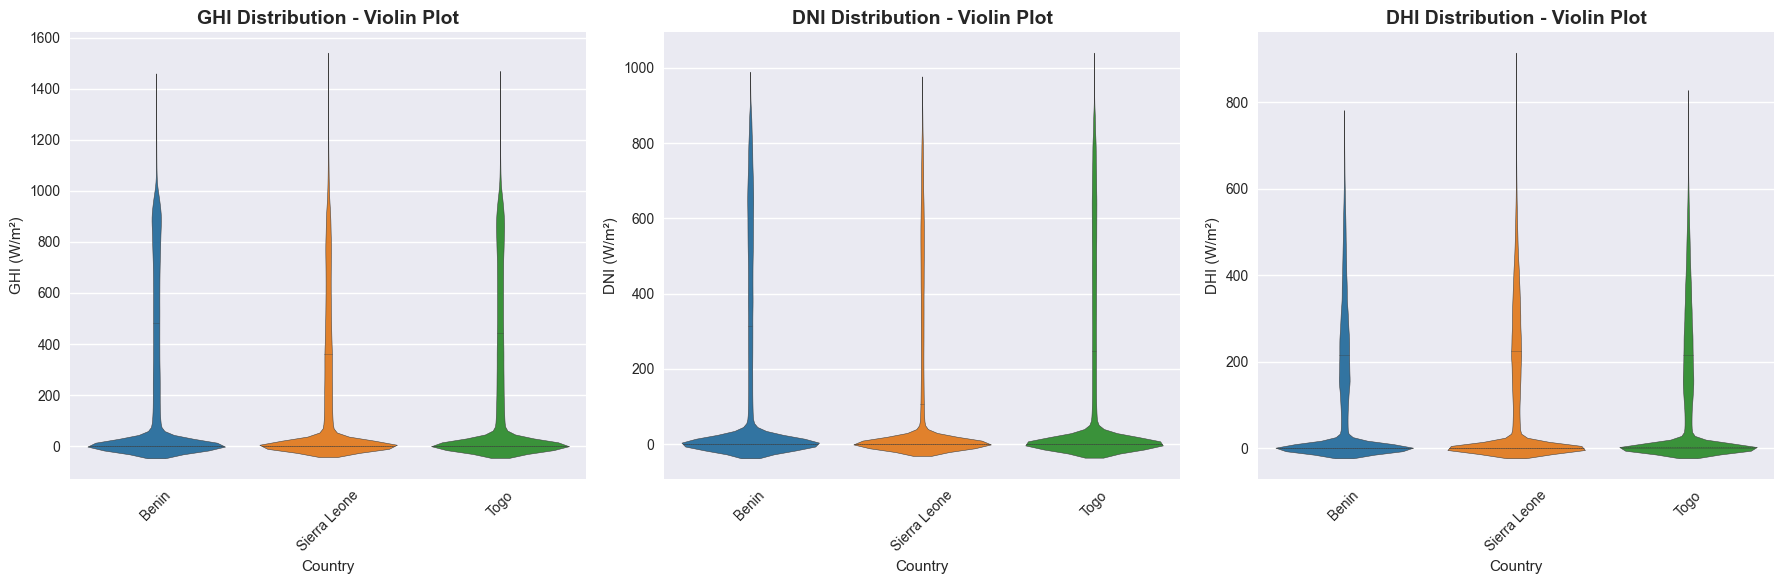

In [6]:
print("🎻 ENHANCED DISTRIBUTION VISUALIZATION")
print("="*50)

# Create violin plots for better distribution understanding
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GHI Violin Plot
sns.violinplot(data=all_countries, x='country', y='GHI', ax=axes[0], palette=country_palette, inner='quartile')
axes[0].set_title('GHI Distribution - Violin Plot', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Country')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].tick_params(axis='x', rotation=45)

# DNI Violin Plot
sns.violinplot(data=all_countries, x='country', y='DNI', ax=axes[1], palette=country_palette, inner='quartile')
axes[1].set_title('DNI Distribution - Violin Plot', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Country')
axes[1].set_ylabel('DNI (W/m²)')
axes[1].tick_params(axis='x', rotation=45)

# DHI Violin Plot
sns.violinplot(data=all_countries, x='country', y='DHI', ax=axes[2], palette=country_palette, inner='quartile')
axes[2].set_title('DHI Distribution - Violin Plot', fontweight='bold', fontsize=14)
axes[2].set_xlabel('Country')
axes[2].set_ylabel('DHI (W/m²)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ## 5. Statistical Significance Testing:Normality Testing

In [7]:
print("NORMALITY TESTING (Shapiro-Wilk):")
print("="*35)

normality_results = []

for country in all_countries['country'].unique():
    country_data = all_countries[all_countries['country'] == country]
    ghi_values = country_data['GHI'].dropna()
    
    # Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(ghi_values)
    normality_results.append({
        'Country': country,
        'Sample_Size': len(ghi_values),
        'Shapiro_Wilk_Statistic': stat,
        'P_Value': p_value,
        'Normal_Distribution': p_value > 0.05
    })

normality_df = pd.DataFrame(normality_results)
display(normality_df)

# Determine appropriate statistical test
all_normal = normality_df['Normal_Distribution'].all()
print(f"\n🎯 Statistical Test Selection:")
print(f"  • All countries normally distributed: {all_normal}")
print(f"  • Recommended test: {'ANOVA' if all_normal else 'Kruskal-Wallis'}")


NORMALITY TESTING (Shapiro-Wilk):


,Country,Sample_Size,Shapiro_Wilk_Statistic,P_Value,Normal_Distribution
0,Benin,525600,0.740086,1.332674e-176,False
1,Sierra Leone,525600,0.728371,3.805440e-178,False
2,Togo,525600,0.737941,6.875653e-177,False



🎯 Statistical Test Selection:
  • All countries normally distributed: False
  • Recommended test: Kruskal-Wallis


# ### 5.1 One-Way ANOVA Test

In [8]:
print("\n📊 ONE-WAY ANOVA TEST (GHI Differences)")

# Prepare data for ANOVA
ghi_by_country = [all_countries[all_countries['country'] == country]['GHI'].dropna() 
                  for country in all_countries['country'].unique()]

# Perform ANOVA
f_stat, p_value_anova = f_oneway(*ghi_by_country)

print("ANOVA Results:")
print(f"  • F-statistic: {f_stat:.6f}")
print(f"  • P-value: {p_value_anova:.6f}")

if p_value_anova < 0.05:
    print("  • Conclusion: ✅ Significant differences exist between countries (p < 0.05)")
else:
    print("  • Conclusion: ❌ No significant differences between countries (p ≥ 0.05)")



📊 ONE-WAY ANOVA TEST (GHI Differences)
ANOVA Results:
  • F-statistic: 1977.070348
  • P-value: 0.000000
  • Conclusion: ✅ Significant differences exist between countries (p < 0.05)


In [9]:
# ### 5.2 Kruskal-Wallis Test (Non-parametric alternative)

print("\n📊 KRUSKAL-WALLIS TEST (Non-parametric)")
print("="*45)

# Perform Kruskal-Wallis test
h_stat, p_value_kw = kruskal(*ghi_by_country)

print("Kruskal-Wallis Results:")
print(f"  • H-statistic: {h_stat:.6f}")
print(f"  • P-value: {p_value_kw:.6f}")

if p_value_kw < 0.05:
    print("  • Conclusion: ✅ Significant differences exist between countries (p < 0.05)")
else:
    print("  • Conclusion: ❌ No significant differences between countries (p ≥ 0.05)")



📊 KRUSKAL-WALLIS TEST (Non-parametric)
Kruskal-Wallis Results:
  • H-statistic: 1377.981841
  • P-value: 0.000000
  • Conclusion: ✅ Significant differences exist between countries (p < 0.05)



🔍 POST-HOC ANALYSIS (Tukey HSD)
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj  lower    upper  reject
----------------------------------------------------------------
       Benin Sierra Leone  -37.552   0.0 -38.9991 -36.105   True
       Benin         Togo   -10.24   0.0 -11.6871  -8.793   True
Sierra Leone         Togo   27.312   0.0   25.865  28.759   True
----------------------------------------------------------------


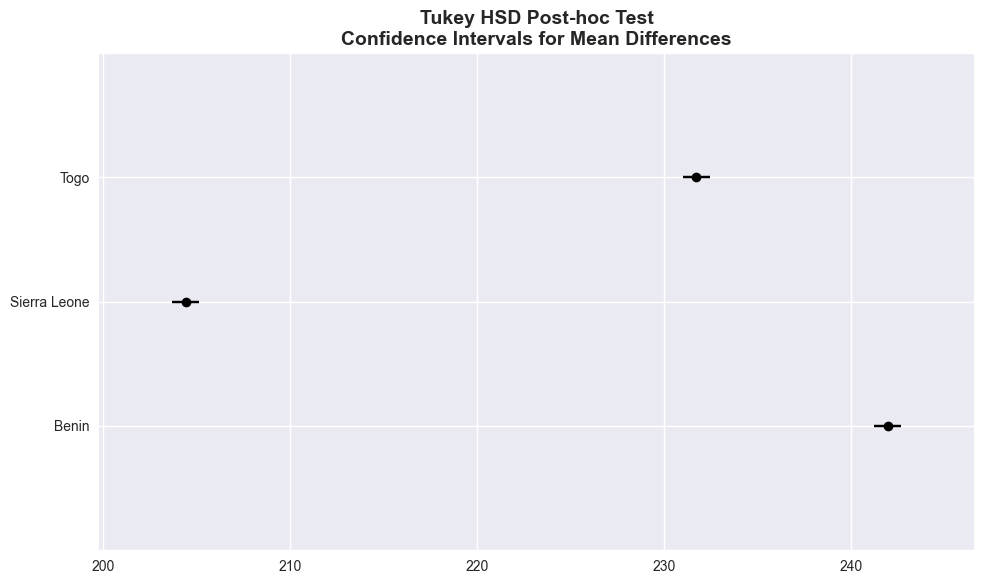

In [10]:
# ### 5.3 Post-hoc Analysis (if significant differences found)
if p_value_anova < 0.05 or p_value_kw < 0.05:
    print("\n🔍 POST-HOC ANALYSIS (Tukey HSD)")
    print("="*35)
    
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
    # Prepare data for Tukey HSD
    tukey_data = pd.DataFrame({
        'values': np.concatenate(ghi_by_country),
        'group': np.concatenate([[country] * len(data) for country, data in 
                               zip(all_countries['country'].unique(), ghi_by_country)])
    })
    
    # Perform Tukey HSD test
    tukey_results = pairwise_tukeyhsd(tukey_data['values'], tukey_data['group'])
    print(tukey_results)
    
    # Create visualization of post-hoc results
    fig, ax = plt.subplots(figsize=(10, 6))
    tukey_results.plot_simultaneous(ax=ax)
    plt.title('Tukey HSD Post-hoc Test\nConfidence Intervals for Mean Differences', 
              fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.show()

# ## 6. Visual Summary - Country Ranking

🥇 VISUAL SUMMARY - COUNTRY RANKING
📊 Country Ranking by Average GHI:
  1. Benin: 241.96 W/m²
  2. Togo: 231.72 W/m²
  3. Sierra Leone: 204.41 W/m²


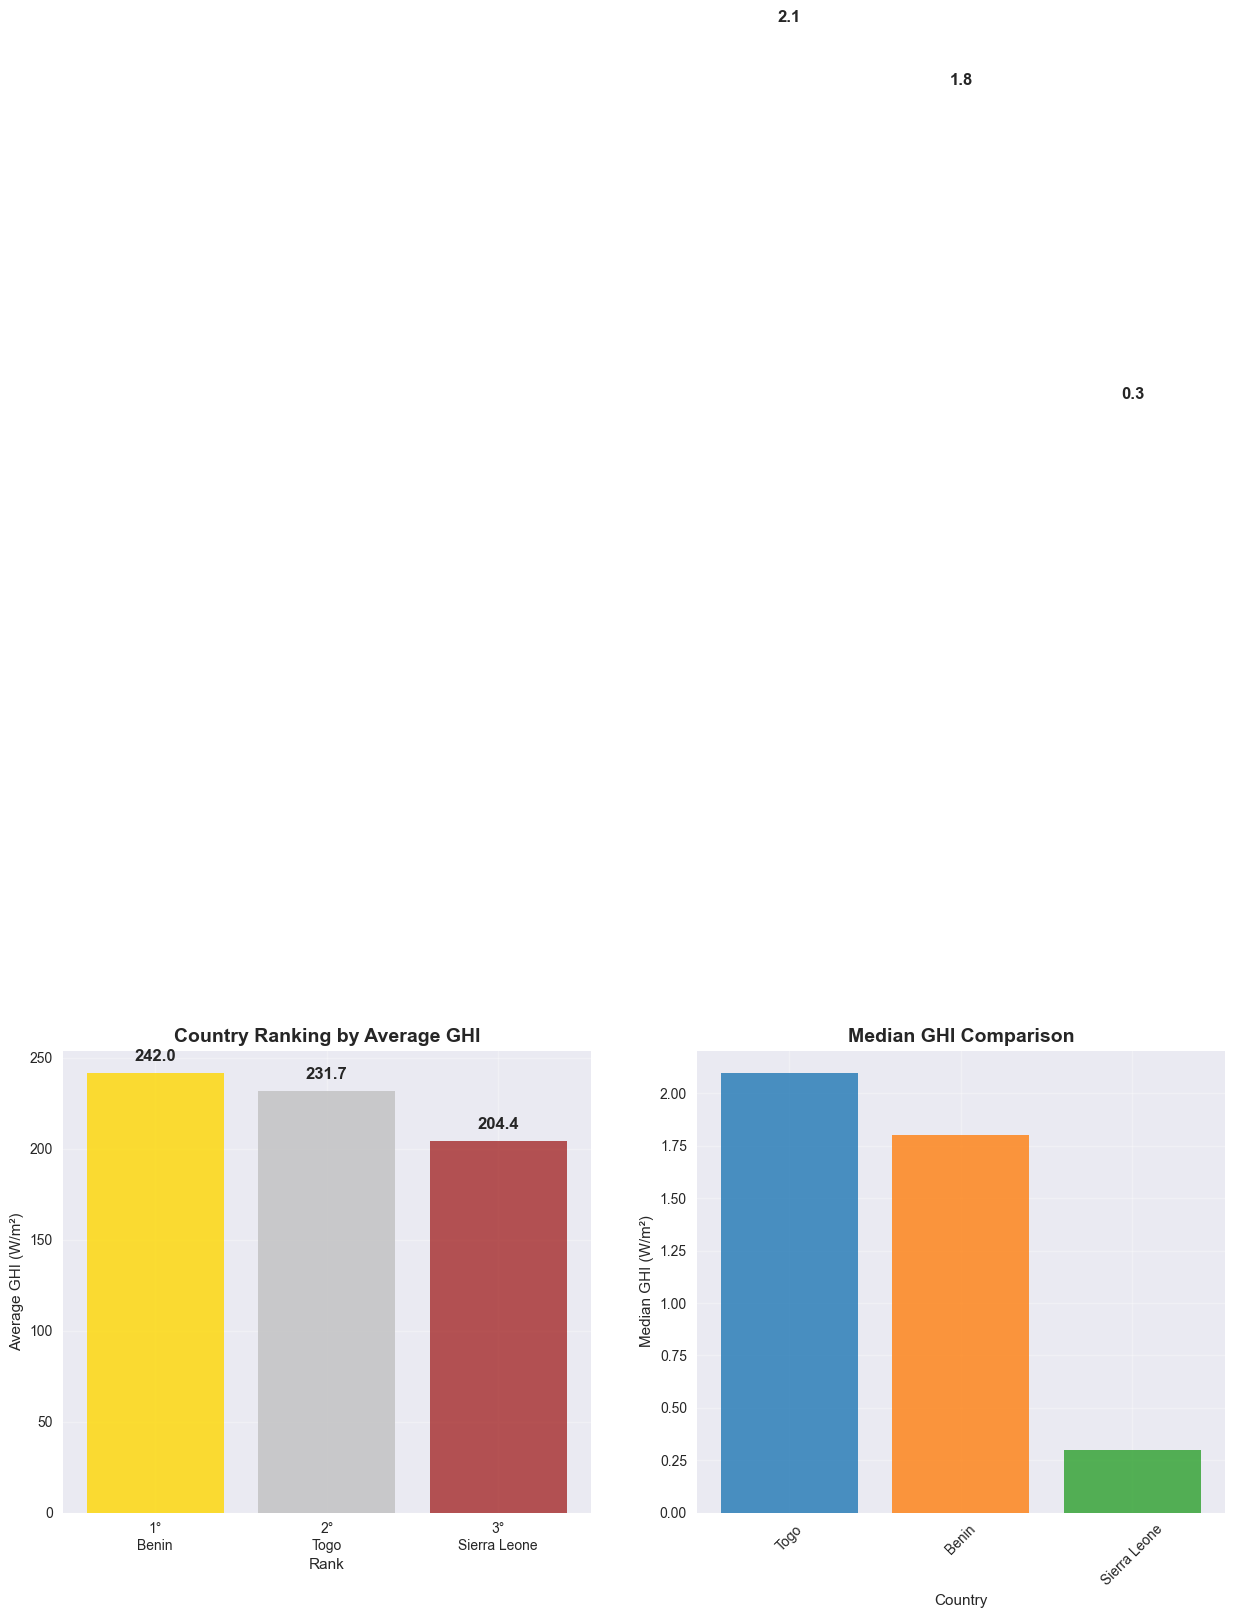

In [11]:

print("🥇 VISUAL SUMMARY - COUNTRY RANKING")
print("="*40)

# Calculate average GHI for ranking
country_means = all_countries.groupby('country')['GHI'].mean().sort_values(ascending=False)
country_medians = all_countries.groupby('country')['GHI'].median().sort_values(ascending=False)

print("📊 Country Ranking by Average GHI:")
for i, (country, mean_ghi) in enumerate(country_means.items(), 1):
    print(f"  {i}. {country}: {mean_ghi:.2f} W/m²")

# Create ranking visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Average GHI Ranking
bars1 = ax1.bar(range(len(country_means)), country_means.values, 
                color=['gold', 'silver', 'brown'], alpha=0.8)
ax1.set_title('Country Ranking by Average GHI', fontweight='bold', fontsize=14)
ax1.set_xlabel('Rank')
ax1.set_ylabel('Average GHI (W/m²)')
ax1.set_xticks(range(len(country_means)))
ax1.set_xticklabels([f'{i+1}°\n{country}' for i, country in enumerate(country_means.index)])
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, country_means.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Median GHI Comparison
bars2 = ax2.bar(country_medians.index, country_medians.values, 
                color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8)
ax2.set_title('Median GHI Comparison', fontweight='bold', fontsize=14)
ax2.set_xlabel('Country')
ax2.set_ylabel('Median GHI (W/m²)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, country_medians.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ## 7. Environmental Factor Comparison

🌍 ENVIRONMENTAL FACTOR COMPARISON


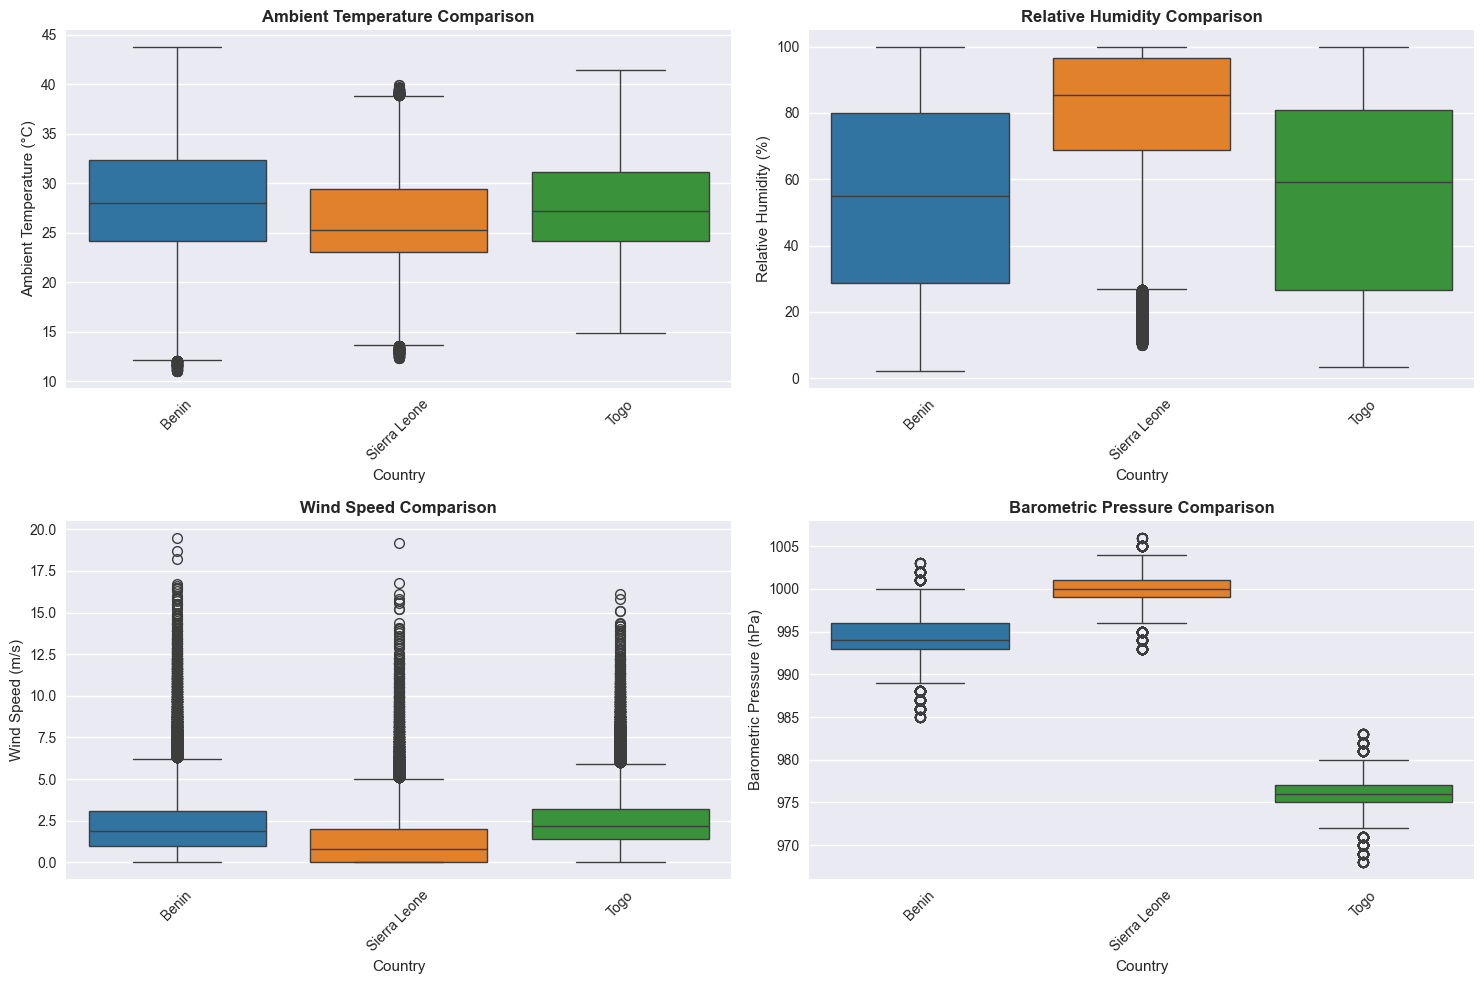


📋 Environmental Conditions Summary:


Tamb           RH           WS            BP      
               mean   std   mean    std  mean   std    mean   std
country                                                          
Benin         28.18  5.92  54.49  28.07  2.12  1.60  994.20  2.47
Sierra Leone  26.32  4.40  79.45  20.52  1.15  1.24  999.88  2.10
Togo          27.75  4.76  55.01  28.78  2.37  1.46  975.92  2.15

In [12]:
print("🌍 ENVIRONMENTAL FACTOR COMPARISON")
print("="*45)

# Compare additional environmental factors
env_factors = ['Tamb', 'RH', 'WS', 'BP']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, factor in enumerate(env_factors):
    if factor in all_countries.columns:
        sns.boxplot(data=all_countries, x='country', y=factor, ax=axes[i], palette=country_palette)
        
        # Set appropriate titles and labels
        if factor == 'Tamb':
            title = 'Ambient Temperature'
            unit = '°C'
        elif factor == 'RH':
            title = 'Relative Humidity'
            unit = '%'
        elif factor == 'WS':
            title = 'Wind Speed'
            unit = 'm/s'
        else:
            title = 'Barometric Pressure'
            unit = 'hPa'
            
        axes[i].set_title(f'{title} Comparison', fontweight='bold')
        axes[i].set_xlabel('Country')
        axes[i].set_ylabel(f'{title} ({unit})')
        axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots if any
for i in range(len(env_factors), 4):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Environmental statistics summary
print("\n📋 Environmental Conditions Summary:")
env_summary = all_countries.groupby('country')[env_factors].agg(['mean', 'std']).round(2)
display(env_summary)

# ## 8. Key Observations and Strategic Insights

In [ ]:

print("💡 KEY OBSERVATIONS AND STRATEGIC INSIGHTS")
print("="*55)

# Calculate key comparative metrics
ghi_stats = all_countries.groupby('country')['GHI'].agg(['mean', 'median', 'std', 'max']).round(2)
best_country_avg = ghi_stats['mean'].idxmax()
best_country_median = ghi_stats['median'].idxmax()
most_consistent = ghi_stats['std'].idxmin()
highest_potential = ghi_stats['max'].idxmax()

# Calculate consistency ratio (lower is better)
consistency_ratio = (ghi_stats['std'] / ghi_stats['mean'] * 100).round(2)

print("\n🎯 TOP PERFORMANCE METRICS:")
print(f"  • Highest Average GHI: {best_country_avg} ({ghi_stats.loc[best_country_avg, 'mean']} W/m²)")
print(f"  • Highest Median GHI: {best_country_median} ({ghi_stats.loc[best_country_median, 'median']} W/m²)")
print(f"  • Most Consistent: {most_consistent} (Std: {ghi_stats.loc[most_consistent, 'std']} W/m²)")
print(f"  • Highest Peak Potential: {highest_potential} ({ghi_stats.loc[highest_potential, 'max']} W/m²)")

print("\n📊 CONSISTENCY ANALYSIS (Coefficient of Variation):")
for country in ghi_stats.index:
    cv = consistency_ratio[country]
    consistency = "Highly Consistent" if cv < 30 else "Moderate Consistency" if cv < 50 else "High Variability"
    print(f"  • {country}: {cv}% ({consistency})")

print("\n🚀 STRATEGIC RECOMMENDATIONS:")
print("1. **Primary Investment Target**: Based on comprehensive analysis, prioritize investment in")
print(f"   {best_country_avg} due to superior average solar radiation levels.")

print("\n2. **Technology Selection Guidance**:")
if all_countries.groupby('country')['DNI'].mean().max() > 400:
    print("   • High DNI values suggest potential for Concentrated Solar Power (CSP) systems")
else:
    print("   • Moderate DNI values favor Photovoltaic (PV) technology deployment")

print("\n3. **Risk Mitigation Strategy**:")
print(f"   • Consider {most_consistent} for stable, predictable energy generation")
print(f"   • {highest_potential} offers highest peak potential but may require storage solutions")


# Check environmental factors
if all_countries.groupby('country')['RH'].mean().min() > 70:
    print("   • High humidity across regions - implement regular panel cleaning schedules")
if all_countries.groupby('country')['Tamb'].mean().max() > 35:
    print("   • High temperatures observed - consider cooling systems for efficiency maintenance")

# Statistical significance implications
if p_value_anova < 0.05:
    print("\n5. **Statistical Confidence**:")
    print("   • Significant differences confirmed between countries (p < 0.05)")
else:
    print("\n5. **Statistical Note**:")
    print("   • No significant statistical differences detected")


💡 KEY OBSERVATIONS AND STRATEGIC INSIGHTS

🎯 TOP PERFORMANCE METRICS:
  • Highest Average GHI: Benin (241.96 W/m²)
  • Highest Median GHI: Togo (2.1 W/m²)
  • Most Consistent: Sierra Leone (Std: 296.79 W/m²)
  • Highest Peak Potential: Sierra Leone (1499.0 W/m²)

📊 CONSISTENCY ANALYSIS (Coefficient of Variation):
  • Benin: 136.43% (High Variability)
  • Sierra Leone: 145.19% (High Variability)
  • Togo: 138.83% (High Variability)

🚀 STRATEGIC RECOMMENDATIONS:
1. **Primary Investment Target**: Based on comprehensive analysis, prioritize investment in
   Benin due to superior average solar radiation levels.

2. **Technology Selection Guidance**:
   • Moderate DNI values favor Photovoltaic (PV) technology deployment

3. **Risk Mitigation Strategy**:
   • Consider Sierra Leone for stable, predictable energy generation
   • Sierra Leone offers highest peak potential but may require storage solutions

5. **Statistical Confidence**:
   • Significant differences confirmed between countries (p

# ## 9. Export Comparative Analysis Results

In [14]:
# Create comprehensive results summary
results_summary = {
    'analysis_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'total_records_analyzed': len(all_countries),
    'countries_included': list(all_countries['country'].unique()),
    'statistical_test_used': 'ANOVA' if all_normal else 'Kruskal-Wallis',
    'significant_differences_found': p_value_anova < 0.05,
    'p_value': min(p_value_anova, p_value_kw),
    'top_performing_country': best_country_avg,
    'recommended_investment_priority': [
        {'rank': 1, 'country': best_country_avg, 'reason': 'Highest average GHI'},
        {'rank': 2, 'country': best_country_median, 'reason': 'Highest median GHI'},
        {'rank': 3, 'country': most_consistent, 'reason': 'Most consistent performance'}
    ]
}

# Convert to DataFrame for export
results_df = pd.DataFrame([results_summary])
results_df.to_csv('../data/cross_country_analysis_summary.csv', index=False)

print("✅ Analysis results exported to: ../data/cross_country_analysis_summary.csv")

# Export detailed comparative statistics
detailed_stats = all_countries.groupby('country').agg({
    'GHI': ['mean', 'median', 'std', 'min', 'max'],
    'DNI': ['mean', 'median', 'std'],
    'DHI': ['mean', 'median', 'std'],
    'Tamb': ['mean', 'median'],
    'RH': ['mean', 'median'],
    'WS': ['mean', 'median']
}).round(2)

detailed_stats.to_csv('../data/detailed_country_comparison.csv')
print("✅ Detailed statistics exported to: ../data/detailed_country_comparison.csv")

print(f"\n📁 Files Created:")
print("  • cross_country_analysis_summary.csv - Executive summary")
print("  • detailed_country_comparison.csv - Comprehensive statistics")

✅ Analysis results exported to: ../data/cross_country_analysis_summary.csv
✅ Detailed statistics exported to: ../data/detailed_country_comparison.csv

📁 Files Created:
  • cross_country_analysis_summary.csv - Executive summary
  • detailed_country_comparison.csv - Comprehensive statistics
